# Keras

- > pip install tensorflow
- > pip install keras

MNIST: 
- 60k training image (28x28)
- 10k testing image (28x28)

In [31]:
from tensorflow import keras
from keras import models 
from keras import layers 
from keras.datasets import mnist

from pathlib import Path 
import matplotlib.pyplot as plt 
import seaborn as sn 

import numpy as np
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Load data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # From internet

In [3]:
file_path = Path("./dataset/mnist.pkl.gz").absolute()
print(file_path)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path = file_path) # From local

c:\Users\M\Desktop\12_ML2\ML2\11_NN\dataset\mnist.pkl.gz


# Explore the data 

In [4]:
print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

print(test_images.shape) # (10000, 28, 28)
print(test_labels.shape) # (10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# VIsualize the images

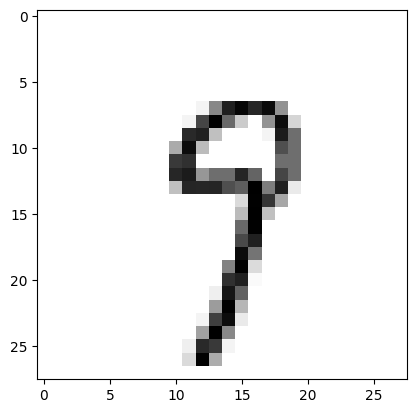

Label: 9


In [5]:
IMAGE_INDEX = 1500 

digit = train_images[IMAGE_INDEX]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


# Label
print(f"Label: {train_labels[IMAGE_INDEX]}")

# Preparing the data

## 1. Reshape the image from 28x28 to 784x1

In [6]:
train_images = train_images.reshape((60000,784))
print(train_images.shape)


test_images = test_images.reshape((10000,784))
print(test_images.shape)

(60000, 784)
(10000, 784)


## 2. Scale the inputs from values 0-255 ---> 0-1

In [7]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

## 3. Prepare the labels -> One Hot encoding

Input [0, 1, 2, 3]

Output:
- [1, 0 , 0 ,0] ---> 0
- [0, 1 , 0 ,0] ---> 1
- [0, 0 , 1 ,0] ---> 2

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
train_labels = to_categorical(train_labels)

train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# Create and Build the model

In [10]:
# Sequential: stack of layers
# Dense: Fully Connected Layer

model = models.Sequential(
    [
    keras.Input(shape=(784,)), # input layer
    
    keras.layers.Dense(512,activation = "sigmoid"),   # 1. hidden layer

    keras.layers.Dense(10,activation = "sigmoid" )   # Output layer
    ]
) 



# Get The Network Summary

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile / Configure the model

- loss : how bad is my model --> MSE, MAE , categorical_crossentropy, etc.
- optimizer: mechanism to update the weights and biases
- metrics: performance of the model --> accuracy
- 

In [12]:
model.compile(loss = "categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# Trainig Phase

In [13]:
# history = model.fit(train_images, train_labels , epochs= 5, shuffle= True)
# history = model.fit(train_images, train_labels , epochs= 5, shuffle= True, validation_data= (test_images, test_labels))
history = model.fit(train_images, train_labels , epochs= 5, shuffle= True, validation_split= 0.2)

Epoch 1/5


1500/1500 [==============================] - 10s 6ms/step - loss: 0.3756 - accuracy: 0.8923 - val_loss: 0.2368 - val_accuracy: 0.9327
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2106 - accuracy: 0.9389 - val_loss: 0.1696 - val_accuracy: 0.9530
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1497 - accuracy: 0.9551 - val_loss: 0.1418 - val_accuracy: 0.9587
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1127 - accuracy: 0.9671 - val_loss: 0.1132 - val_accuracy: 0.9665
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0892 - accuracy: 0.9736 - val_loss: 0.1024 - val_accuracy: 0.9698


# Plot the accuracy

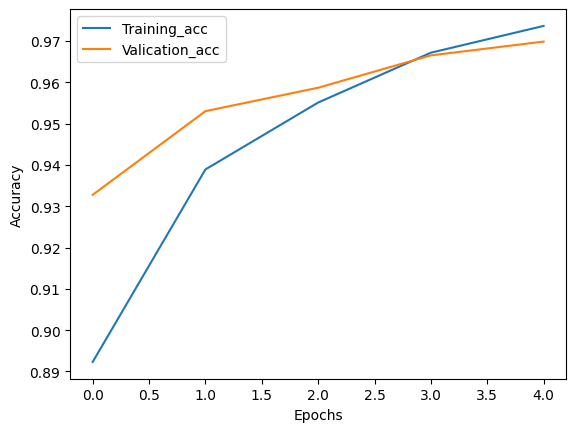

In [15]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Training_acc", "Valication_acc"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Predictions using Test Data

In [21]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [22]:
for i in predictions:
    print(i)

[3.8759285e-09 1.2557461e-11 1.0864033e-07 8.8734023e-06 4.6866493e-11
 2.6804636e-09 2.4984507e-14 3.7876628e-02 5.1141082e-09 3.8177399e-07]
[6.4458493e-07 3.9553564e-04 3.0004179e-01 1.5690463e-05 1.9729177e-12
 2.2807369e-06 6.3297266e-06 4.3415288e-13 4.0131820e-07 7.0955875e-14]
[1.7039305e-12 1.5411086e-04 1.9542817e-08 1.9813078e-09 4.0825499e-10
 2.6410720e-09 9.3852226e-10 8.9829211e-09 9.0226733e-09 1.8011637e-10]
[6.41603097e-02 9.33413524e-09 2.93576722e-05 1.68474799e-06
 5.82447819e-06 6.14232295e-06 1.28639085e-05 7.03665683e-06
 9.85678383e-08 6.57711007e-06]
[1.9865638e-09 4.4481506e-12 8.3639883e-08 1.7563920e-10 2.2434115e-03
 6.1126193e-09 1.1149315e-08 1.2419345e-07 1.4314284e-08 2.4339633e-06]
[9.8247634e-12 1.7126619e-03 9.4783594e-09 5.2419407e-09 2.6887537e-09
 7.3158296e-10 1.8223188e-10 6.3320653e-07 1.3719229e-08 3.4470720e-09]
[9.2844560e-12 1.2115804e-10 1.0391507e-09 1.7468778e-09 4.0689155e-02
 1.9757806e-07 3.1938450e-09 1.8508680e-06 7.2939929e-06 1.2

In [25]:
rounded_predictions = np.argmax(predictions, axis = 1) # though rows

for i in rounded_predictions:
    print(i)

7
2
1
0
4
1
4
9
6
9
0
6
9
0
1
5
9
7
3
4
9
6
6
5
4
0
7
4
0
1
3
1
3
4
7
2
7
1
2
1
1
7
4
2
3
5
1
2
4
4
6
3
5
5
6
0
4
1
9
5
7
8
9
3
7
4
6
4
3
0
7
0
2
9
1
7
3
2
9
7
7
6
2
7
8
4
7
3
6
1
3
6
9
3
1
4
1
7
6
9
6
0
5
4
9
9
2
1
9
4
8
7
3
9
7
4
4
4
9
2
5
4
7
6
7
9
0
5
8
5
6
6
5
7
8
1
0
1
6
4
6
7
3
1
7
1
8
2
0
2
9
9
5
5
1
5
6
0
3
4
4
6
5
4
6
5
4
5
1
4
4
7
2
3
2
7
1
8
1
8
1
8
5
0
8
9
2
5
0
1
1
1
0
9
0
3
1
6
4
2
3
6
1
1
1
3
9
5
2
9
4
5
9
3
9
0
3
6
5
5
7
2
2
7
1
2
8
4
1
7
3
3
8
8
7
9
2
2
4
1
5
9
8
7
2
3
0
2
4
2
4
1
9
5
7
7
2
8
2
0
8
5
7
7
9
1
8
1
8
0
3
0
1
9
9
4
1
8
2
1
2
9
7
5
9
2
6
4
1
5
8
2
9
2
0
4
0
0
2
8
4
7
1
2
4
0
2
7
4
3
3
0
0
3
1
9
6
5
2
5
7
7
9
3
0
4
2
0
7
1
1
2
1
5
3
3
9
7
8
6
5
6
1
3
8
1
0
5
1
3
1
5
5
6
1
8
5
1
7
9
4
6
2
2
5
0
6
5
6
3
7
2
0
8
8
5
4
1
1
4
0
7
3
7
6
1
6
2
1
9
2
8
6
1
9
5
2
5
4
4
2
8
3
8
2
4
5
0
3
1
7
7
5
7
9
7
1
9
2
1
4
2
9
2
0
4
9
1
4
8
1
8
4
5
9
8
8
3
7
6
0
0
3
0
2
0
6
9
9
3
3
3
2
3
9
1
2
6
8
0
5
6
6
6
3
8
8
2
7
5
8
9
6
1
8
4
1
2
5
9
1
9
7
5
4
0
8
9
9
1
0
5
2
3
7
2
9
4
0
6


# Compare between truth and predicted

In [30]:
IMAGE_INDEX = 1500

print(test_labels[IMAGE_INDEX])
print(rounded_predictions[IMAGE_INDEX])

7
1


# Confusion Matrix

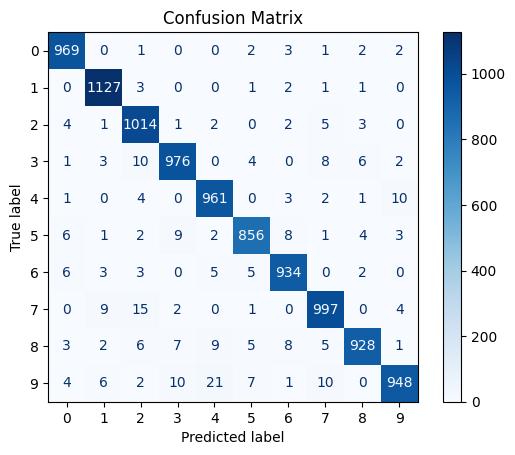

In [32]:
cm = confusion_matrix(test_labels, rounded_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= np.arange(10))
disp.plot(cmap= "Blues", values_format= "d")
plt.title("Confusion Matrix")
plt.show()

# Evaluate the model

In [33]:
loss_val, acc = model.evaluate(train_images, train_labels)

print("Loss:", loss_val)
print("Acc:", acc)


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0776 - accuracy: 0.9777
Loss: 0.07757776975631714
Acc: 0.9776666760444641


# Save the model

In [34]:
# New School from Keras
model.save('./models/nn_v1.keras')

In [37]:
# Old School (Legacy) but still in products
model.save("./models/nn_v1.h5")

c:\Python\Python3116\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
# Save the weights
model.save_weights("./models/nn_v1_weights.h5")

# Load the model

In [35]:
model2 = keras.models.load_model('./models/nn_v1.keras') # architecture and weights

In [40]:
# Load the weights
model2.load_weights("./models/nn_v1_weights.h5") # weights

In [36]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
